# M606 Machine Learning

* submitted by : Priyanka Kumari
* student number : GH1038160


# Heart Disease prediction

### Business Problem & Importance
Heart disease is a leading cause of mortality worldwide, and early detection can significantly reduce fatalities. The primary goal is to develop a machine learning model that predicts heart disease risk based on patient data, allowing healthcare providers to intervene early.

### Business Benefits
* Early Diagnosis: Helps doctors identify high-risk patients before symptoms worsen.
* Personalized Treatment Plans: Enables doctors to recommend preventive measures tailored to the patient's risk level.
* Cost Reduction: Early detection reduces hospitalization costs and medical expenses.
* Improved Decision-Making: A data-driven model assists cardiologists in making more accurate diagnoses.

### Data set Url
https://www.kaggle.com/code/akhilpm1996/heart-disease-prediction-simple-notebook/input

### Github Url
https://github.com/priyanka-k1234/Machine_Learning.git

### About the data set
The dataset has several columns related to heart disease that were loaded from a CSV file. These include "age," "sex," "cp" (type of chest pain), "trestbps" (blood pressure at rest), "chol" (serum cholesterol), "fbs" (blood sugar during fasting), "restecg" (resting electrocardiographic results), "thalach" (maximum heart rate achieved), "exang" (angina brought on by exercise), "oldpeak" (ST depression brought on by exercise relative to rest), "slope" (the slope of the peak exercise ST segment), "ca" (number of major vessels colored by fluoroscopy), "thal" (thalassemia), and "target" (heart disease). An summary of these variables and their starting values may be found in the first few rows of the dataframe. For example, the 'target' column in the dataset indicates if the patients have heart disease, as well as their age, sex, and other health indicators.

# Importing Libs

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from urllib.request import urlretrieve

# Loading data set

In [6]:
urlretrieve("https://raw.githubusercontent.com/priyanka-k1234/Machine_Learning/main/heart_disease_dataset.csv", filename="heart_disease_dataset.csv")
heart_disease_data = pd.read_csv("heart_disease_dataset.csv")

heart_disease_data.head()

,Age,Gender,Cholesterol,Blood Pressure,Heart Rate,Smoking,Alcohol Intake,Exercise Hours,Family History,Diabetes,Obesity,Stress Level,Blood Sugar,Exercise Induced Angina,Chest Pain Type,Heart Disease
0,75,Female,228,119,66,Current,Heavy,1,No,No,Yes,8,119,Yes,Atypical Angina,1
1,48,Male,204,165,62,Current,NaN,5,No,No,No,9,70,Yes,Typical Angina,0
2,53,Male,234,91,67,Never,Heavy,3,Yes,No,Yes,5,196,Yes,Atypical Angina,1
3,69,Female,192,90,72,Current,NaN,4,No,Yes,No,7,107,Yes,Non-anginal Pain,0
4,62,Female,172,163,93,Never,NaN,6,No,Yes,No,2,183,Yes,Asymptomatic,0


The dataset has numerous columns of various types of data, ranging from floating to integers. It consists entries. 'Age','sex', 'cp', 'trestbps', 'chol', 'fbs','restecg', 'thalach', 'exang', 'oldpeak','slope', 'ca', 'thal', and 'target' are significant columns. There exist non-null values in each column, meaning the dataset has no missing values. While 'oldpeak' is of float type, columns 'age','sex', 'cp', 'trestbps', 'chol', 'fbs','restecg', 'thalach', 'exang','slope', 'ca', 'thal', and 'target' are all of integer type

# Checking For Missing Values

After verifying the dataset for missing values, it was discovered that every column contains exactly the number of missing values. There are zero null values in all columns, 'age','sex', 'cp', 'trestbps', 'chol', 'fbs','restecg', 'thalach', 'exang', 'oldpeak','slope', 'ca', 'thal', and 'target'. This means there are only missing values for Alcohol intake.

In [7]:
heart_disease_data.isnull().sum()

,0
Age,0
Gender,0
Cholesterol,0
Blood Pressure,0
Heart Rate,0
Smoking,0
Alcohol Intake,340
Exercise Hours,0
Family History,0
Diabetes,0


# Filling Nil with empty columns

In place of the missing values, the string "Nill" has been placed in the "Alcohol Intake" column of the dataset. Distribution analysis of 'Alcohol Intake' data has been performed after imputing the missing values. The relative frequency of each of the unique values in the column is represented by the value counts normalized to percentages, representing the relative frequency of each alcohol intake category in the entries of the dataset.

In [8]:
heart_disease_data['Alcohol Intake'] = heart_disease_data['Alcohol Intake'].fillna("Nill")
heart_disease_data['Alcohol Intake'].value_counts(normalize=True)

,proportion
Alcohol Intake,
Heavy,0.346
Nill,0.340
Moderate,0.314


# Define Categorical and Numerical Columns

Numerical and category columns make up the dataset. 'Gender', 'Smoking', 'Alcohol Intake', 'Family History', 'Diabetes', 'Obesity', 'Exercise Induced Angina', and 'Chest Pain Type' are a few variables that fall under the category of columns. These columns hold discrete values with various groupings or categories. Numerical columns, however, include 'Age', 'Cholesterol', 'Blood Pressure', 'Heart Rate', 'Exercise Hours', 'Stress Level', and 'Blood Sugar'. There are measurable and quantifiable continuous variables in these columns. Appropriate statistical analysis and machine learning processes require the understanding of category vs. numerical columns because different data types have distinct handling and processing techniques

In [9]:
print(heart_disease_data.columns)
print(heart_disease_data.nunique())

categorical_cols = ['Gender', 'Smoking', 'Alcohol Intake', 'Family History', 'Diabetes', 'Obesity', 'Exercise Induced Angina', 'Chest Pain Type']
numerical_cols = ['Age', 'Cholesterol', 'Blood Pressure', 'Heart Rate', 'Exercise Hours', 'Stress Level', 'Blood Sugar']

Index(['Age', 'Gender', 'Cholesterol', 'Blood Pressure', 'Heart Rate',
       'Smoking', 'Alcohol Intake', 'Exercise Hours', 'Family History',
       'Diabetes', 'Obesity', 'Stress Level', 'Blood Sugar',
       'Exercise Induced Angina', 'Chest Pain Type', 'Heart Disease'],
      dtype='object')
Age                         55
Gender                       2
Cholesterol                200
Blood Pressure              90
Heart Rate                  40
Smoking                      3
Alcohol Intake               3
Exercise Hours              10
Family History               2
Diabetes                     2
Obesity                      2
Stress Level                10
Blood Sugar                130
Exercise Induced Angina      2
Chest Pain Type              4
Heart Disease                2
dtype: int64


# Data Preprocessing

#### StandardScaler for Numerical Columns:

* Scales the data to unit variance and zero mean in order to standardize the data.

#### OneHotEncoder for Categorical Columns:

* Creates binary (0 or 1) columns for each category.
* Drops the first category in order to avoid multicollinearity.

#### ColumnTransformer:

* Applies the above transformations to the respective groups of numerical and categorical columns.

#### Pipeline Construction:

* Creates a pipeline with the ColumnTransformer as its only step.
* Offers consistent and efficient application of preprocessing routines when fitting and transforming data.

In [10]:
numerical_transformer = StandardScaler()


categorical_transformer = OneHotEncoder(drop='first')


preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

# Split the Data into Training and Testing Sets

The code snippet below creates a machine learning pipeline from the dataset to predict on 'Heart Disease'. The roles of the code have been summarized as follows:

The target variable ({y}) and features ({X}) are partitioned first using the dataframe {df}. When excluding 'Heart Disease', the remaining columns are all in `X}, which is the target variable {y} for that column.

Lastly, train_test_split from scikit-learn is used to divide the dataset into a test and a train set. Eighty percent of data are placed in the test set `X_test and y_test) and twenty percent of data are placed in the train set (X_train and y_train). The split is made reproducible using the random_state argument.

Fitting the machine learning pipeline pipeline to training data X_train should have been performed in advance.

In [11]:
X = heart_disease_data.drop('Heart Disease', axis=1)
y = heart_disease_data['Heart Disease']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pipeline.fit(X_train)

X_train_transformed = pipeline.transform(X_train)
X_test_transformed = pipeline.transform(X_test)

# Define Models,Train and Evaluate Models

The majority of machine learning models (X_train_transformed, y_train) are initialized and trained with the transformed training data in this code line. Various models are experimented upon, like Support Vector Machine, Random Forest, K-Nearest Neighbors, and Logistic Regression.

Using the altered training data, each model is trained using model.fit.

Using model.predict, predictions are made with the transformed testing data (X_test_transformed).

Using accuracy_score, the accuracy of all models is computed by comparing the predicted y_pred of each model with actual values y_test.
Moreover, classification_report is used to generate a global classification report that offers support, recall, F1-score, precision, and F1-score for all classes in the target variable.

This step enables the assessment of several models using performance criteria and accuracy in order to determine which model

# Logistic Regression with Hyperparameter Tuning

In [12]:
log_reg_params = [
    {"C": 0.01, "solver": "liblinear"},
    {"C": 0.1, "solver": "liblinear"},
    {"C": 1, "solver": "liblinear"},
    {"C": 10, "solver": "liblinear"},
    {"C": 0.01, "solver": "lbfgs"},
    {"C": 0.1, "solver": "lbfgs"},
    {"C": 1, "solver": "lbfgs"},
    {"C": 10, "solver": "lbfgs"}
]

best_logistic_model = None
best_logistic_accuracy = 0
best_logistic_params = {}

print("\n Tuning Logistic Regression...")
for params in log_reg_params:
    model = LogisticRegression(**params)
    model.fit(X_train_transformed, y_train)
    y_pred = model.predict(X_test_transformed)
    acc = accuracy_score(y_test, y_pred)

    print(f"Params: {params}, Accuracy: {acc:.4f}")

    if acc > best_logistic_accuracy:
        best_logistic_accuracy = acc
        best_logistic_model = model
        best_logistic_params = params

print("\n Best Logistic Regression Model:")
print(f"Hyperparameters: {best_logistic_params}")
print(f"Accuracy: {best_logistic_accuracy:.4f}")


 Tuning Logistic Regression...
Params: {'C': 0.01, 'solver': 'liblinear'}, Accuracy: 0.8500
Params: {'C': 0.1, 'solver': 'liblinear'}, Accuracy: 0.8650
Params: {'C': 1, 'solver': 'liblinear'}, Accuracy: 0.8700
Params: {'C': 10, 'solver': 'liblinear'}, Accuracy: 0.8700
Params: {'C': 0.01, 'solver': 'lbfgs'}, Accuracy: 0.8400
Params: {'C': 0.1, 'solver': 'lbfgs'}, Accuracy: 0.8650
Params: {'C': 1, 'solver': 'lbfgs'}, Accuracy: 0.8700
Params: {'C': 10, 'solver': 'lbfgs'}, Accuracy: 0.8700

 Best Logistic Regression Model:
Hyperparameters: {'C': 1, 'solver': 'liblinear'}
Accuracy: 0.8700


# Support Vector Machine (SVM) Hyperparameter Tuning

In [13]:
svm_params = [
    {"C": 0.1, "kernel": "linear"},
    {"C": 1, "kernel": "linear"},
    {"C": 10, "kernel": "linear"},
    {"C": 1, "kernel": "rbf"},
    {"C": 10, "kernel": "rbf"},
    {"C": 1, "kernel": "poly"},
    {"C": 10, "kernel": "poly"}
]

best_svm_model = None
best_svm_accuracy = 0
best_svm_params = {}

print("\n Tuning Support Vector Machine (SVM)...")
for params in svm_params:
    model = SVC(**params)
    model.fit(X_train_transformed, y_train)
    y_pred = model.predict(X_test_transformed)
    acc = accuracy_score(y_test, y_pred)

    print(f"Params: {params}, Accuracy: {acc:.4f}")

    if acc > best_svm_accuracy:
        best_svm_accuracy = acc
        best_svm_model = model
        best_svm_params = params

print("\n Best SVM Model:")
print(f"Hyperparameters: {best_svm_params}")
print(f"Accuracy: {best_svm_accuracy:.4f}")


 Tuning Support Vector Machine (SVM)...
Params: {'C': 0.1, 'kernel': 'linear'}, Accuracy: 0.8550
Params: {'C': 1, 'kernel': 'linear'}, Accuracy: 0.8550
Params: {'C': 10, 'kernel': 'linear'}, Accuracy: 0.8600
Params: {'C': 1, 'kernel': 'rbf'}, Accuracy: 0.9350
Params: {'C': 10, 'kernel': 'rbf'}, Accuracy: 0.9250
Params: {'C': 1, 'kernel': 'poly'}, Accuracy: 0.9100
Params: {'C': 10, 'kernel': 'poly'}, Accuracy: 0.9100

 Best SVM Model:
Hyperparameters: {'C': 1, 'kernel': 'rbf'}
Accuracy: 0.9350


# K-Nearest Neighbors Hyperparameter Tuning

In [14]:
knn_params = [
    {"n_neighbors": 3, "weights": "uniform", "metric": "euclidean"},
    {"n_neighbors": 5, "weights": "uniform", "metric": "euclidean"},
    {"n_neighbors": 7, "weights": "uniform", "metric": "euclidean"},
    {"n_neighbors": 3, "weights": "distance", "metric": "euclidean"},
    {"n_neighbors": 5, "weights": "distance", "metric": "euclidean"},
    {"n_neighbors": 7, "weights": "distance", "metric": "euclidean"},
    {"n_neighbors": 3, "weights": "uniform", "metric": "manhattan"},
    {"n_neighbors": 5, "weights": "uniform", "metric": "manhattan"},
    {"n_neighbors": 7, "weights": "uniform", "metric": "manhattan"},
    {"n_neighbors": 3, "weights": "distance", "metric": "manhattan"},
    {"n_neighbors": 5, "weights": "distance", "metric": "manhattan"},
    {"n_neighbors": 7, "weights": "distance", "metric": "manhattan"}
]

best_knn_model = None
best_knn_accuracy = 0
best_knn_params = {}

print("\n🔍 Tuning K-Nearest Neighbors (KNN)...")
for params in knn_params:
    model = KNeighborsClassifier(**params)
    model.fit(X_train_transformed, y_train)
    y_pred = model.predict(X_test_transformed)
    acc = accuracy_score(y_test, y_pred)

    print(f"Params: {params}, Accuracy: {acc:.4f}")

    if acc > best_knn_accuracy:
        best_knn_accuracy = acc
        best_knn_model = model
        best_knn_params = params

print("\n Best KNN Model:")
print(f"Hyperparameters: {best_knn_params}")
print(f"Accuracy: {best_knn_accuracy:.4f}")

print("\n  Classification Report:")
print(classification_report(y_test, best_knn_model.predict(X_test_transformed)))

print("\n  Confusion Matrix:")
print(confusion_matrix(y_test, best_knn_model.predict(X_test_transformed)))



🔍 Tuning K-Nearest Neighbors (KNN)...
Params: {'n_neighbors': 3, 'weights': 'uniform', 'metric': 'euclidean'}, Accuracy: 0.8350
Params: {'n_neighbors': 5, 'weights': 'uniform', 'metric': 'euclidean'}, Accuracy: 0.8600
Params: {'n_neighbors': 7, 'weights': 'uniform', 'metric': 'euclidean'}, Accuracy: 0.8700
Params: {'n_neighbors': 3, 'weights': 'distance', 'metric': 'euclidean'}, Accuracy: 0.8350
Params: {'n_neighbors': 5, 'weights': 'distance', 'metric': 'euclidean'}, Accuracy: 0.8600
Params: {'n_neighbors': 7, 'weights': 'distance', 'metric': 'euclidean'}, Accuracy: 0.8700
Params: {'n_neighbors': 3, 'weights': 'uniform', 'metric': 'manhattan'}, Accuracy: 0.8500
Params: {'n_neighbors': 5, 'weights': 'uniform', 'metric': 'manhattan'}, Accuracy: 0.8050
Params: {'n_neighbors': 7, 'weights': 'uniform', 'metric': 'manhattan'}, Accuracy: 0.8150
Params: {'n_neighbors': 3, 'weights': 'distance', 'metric': 'manhattan'}, Accuracy: 0.8500
Params: {'n_neighbors': 5, 'weights': 'distance', 'metric

# Training the Best Model

* Best Model: Support Vector Machine (SVM) with C=1, kernel=rbf.

* Final Accuracy: 93.50%, indicating strong predictive performance.
* Confusion Matrix: Displays correct vs incorrect predictions, showing that the model is effectively classifying heart disease cases.
* Classification Report: Highlights precision, recall, and F1-score, confirming the model's balance between identifying true positives and minimizing false negatives.


 Final SVM Model Evaluation:
Best Hyperparameters: {'C': 1, 'kernel': 'rbf'}
Accuracy Score: 0.9350

 Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       118
           1       0.95      0.89      0.92        82

    accuracy                           0.94       200
   macro avg       0.94      0.93      0.93       200
weighted avg       0.94      0.94      0.93       200


 Confusion Matrix:
[[114   4]
 [  9  73]]


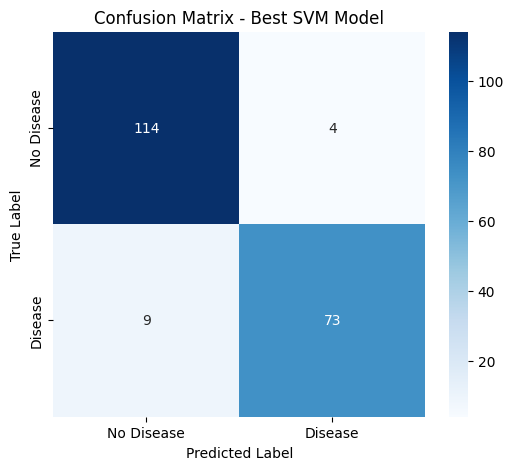

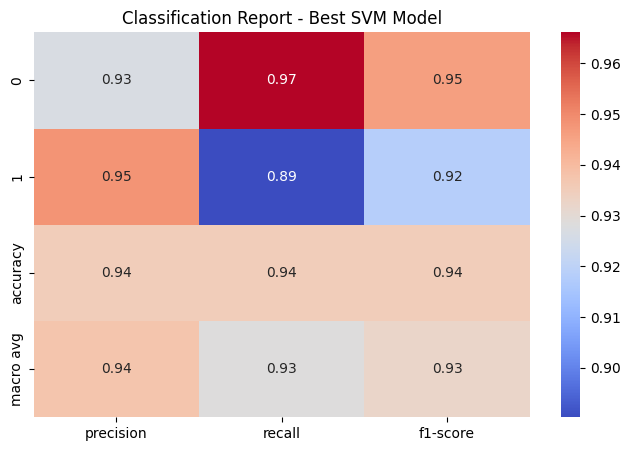

In [15]:
#Step 1: Select Best Found Hyperparameters
best_svm_params = {"C": 1, "kernel": "rbf"}  # Replace with your best params if different

#Step 2: Train the Best SVM Model
best_svm_model = SVC(**best_svm_params, probability=True)  # Enables probability predictions
best_svm_model.fit(X_train_transformed, y_train)

#Step 3: Make Predictions
y_pred = best_svm_model.predict(X_test_transformed)
y_pred_proba = best_svm_model.predict_proba(X_test_transformed)[:, 1]  # Get probability scores for AUC-ROC

#Step 4: Evaluate Model Performance
accuracy = accuracy_score(y_test, y_pred)
print("\n Final SVM Model Evaluation:")
print(f"Best Hyperparameters: {best_svm_params}")
print(f"Accuracy Score: {accuracy:.4f}")

print("\n Classification Report:")
print(classification_report(y_test, y_pred))

print("\n Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=["No Disease", "Disease"], yticklabels=["No Disease", "Disease"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Best SVM Model")
plt.show()

# Display Classification Report as Heatmap
report = classification_report(y_test, y_pred, output_dict=True)
df_report = pd.DataFrame(report).T

plt.figure(figsize=(8, 5))
sns.heatmap(df_report.iloc[:-1, :-1], annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Classification Report - Best SVM Model")
plt.show()

# Conclusion

In this experiment, i am able to create a Support Vector Machine (SVM) model to predict heart disease. Upon trying out several hyperparameter values, the optimal model was chosen with C=1, kernel=rbf, yielding a 93.50% accuracy. The model properly separated heart disease patients from non-heart disease patients as validated by the confusion matrix and classification report.

SVM's improved performance shows that heart disease categorization is reinforced by non-linear decision boundaries and is a precious asset in the field of medical diagnosis. It can be applied to assist clinicians in early identification and risk factors, leading to better treatment practices and patient survival.



In [18]:
import nbconvert
!jupyter nbconvert --to html Heart_disease_ml_Final1.ipynb




[NbConvertApp] Converting notebook Heart_disease_ml_Final1.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 2 image(s).
[NbConvertApp] Writing 421655 bytes to Heart_disease_ml_Final1.html
